# HDSC Winter ‘23 Premiere Project
## Presentation: NBA Players’ Salaries Prediction
### by Beautiful Soup Group

#### Introduction:
The National Basketball Association (NBA) is a men’s professional basketball league in North America consisting of 30 teams, 29 from North America and one from Canada. It was founded in 1946. NBA is known for its talented players and at season players are paid. 
The NBA players' dataset comprises different basketball players alongside their salaries from the 2019 to 2025 season each in a range of one which can vary greatly depending on a variety of factors, such as their experience, performance, position, and the team they play for.

In [2]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
sb.set_style("darkgrid")

In [3]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# load the data
nba_df=pd.read_csv('NBA Players Salaries 1920.csv')
nba_df.head()

,Rk,Player,Tm,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,Signed Using,Guaranteed
0,1,Stephen Curry\curryst01,GSW,40231758.00 $,43006362.00 $,45780966.00 $,NaN,NaN,NaN,Bird Rights,129019086.00 $
1,2,Chris Paul\paulch01,OKC,38506482.00 $,41358814.00 $,44211146.00 $,NaN,NaN,NaN,Bird Rights,79865296.00 $
2,3,Russell Westbrook\westbru01,HOU,38178000.00 $,41006000.00 $,43848000.00 $,46662000.00 $,NaN,NaN,Bird Rights,123032000.00 $
3,4,John Wall\walljo01,WAS,37800000.00 $,40824000.00 $,43848000.00 $,46872000.00 $,NaN,NaN,Bird Rights,122472000.00 $
4,5,James Harden\hardeja01,HOU,37800000.00 $,40824000.00 $,43848000.00 $,46872000.00 $,NaN,NaN,Bird Rights,122472000.00 $


## Assessing the Data

In [4]:
# shape of the data
nba_df.shape

(568, 11)

In [5]:
# gives information about the dataset
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rk            568 non-null    int64 
 1   Player        568 non-null    object
 2   Tm            568 non-null    object
 3   2019-20       568 non-null    object
 4   2020-21       349 non-null    object
 5   2021-22       206 non-null    object
 6   2022-23       96 non-null     object
 7   2023-24       21 non-null     object
 8   2024-25       3 non-null      object
 9   Signed Using  455 non-null    object
 10  Guaranteed    568 non-null    object
dtypes: int64(1), object(10)
memory usage: 48.9+ KB


In [6]:
# check percentage of null value in each column
nba_df.isna().sum()/len(nba_df)*100 

Rk               0.000000
Player           0.000000
Tm               0.000000
2019-20          0.000000
2020-21         38.556338
2021-22         63.732394
2022-23         83.098592
2023-24         96.302817
2024-25         99.471831
Signed Using    19.894366
Guaranteed       0.000000
dtype: float64

In [7]:
# check for duplicate rows
nba_df.duplicated().sum()

0

In [8]:
# checking the value count of type of contract signed by the player
nba_df['Signed Using'].value_counts()

1st Round Pick         104
Minimum Salary          98
Cap Space               68
MLE                     54
Bird Rights             44
Cap space               22
1st Round pick          22
Room Exception          15
Sign and Trade          10
Early Bird Rights        9
Non-Bird Exception       2
Bi-annual Exception      2
1st round pick           1
Maximum Salary           1
Bi-Annual Exception      1
DPE                      1
MInimum Salary           1
Name: Signed Using, dtype: int64

### Observations from assessing the data: 
After assessing the data, it was observed that:
* The data comprise of 568 observations and 11 columns. 
* Out of the 11 columns, 6 columns had missing values. 
* Three (3) of the columns (2022-23, 2023-24, 2024-25) above had over 80% of missing data.
* Some of the values from the 'signed using'column are repeated but seen as a different values due to cases used, all categorical varibales will be converted to lowercase.
* Salary variables are in category data type and will be converted to float datatype.
* Dollar sign contained in the salary columns, this will be removed.

The following issues will be addressed in the data cleaning section

### Data Cleaning

#### 1. converting categorical columns to lowercase

In [9]:
# converting categorical columns to lowercase
nba_df=nba_df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

#### 2. Dropping columns with over 80% of missing values

In [10]:
drop_col=['2022-23','2023-24','2024-25']
nba_df.drop(drop_col, axis=1, inplace=True)

#### 3. Removing the dollar sign from the salary columns and converting the datatype to float

In [11]:
float_col=['2019-20','2020-21','2021-22','Guaranteed']
for col in float_col:
    pd.options.display.float_format='{:,.2f}'.format
    nba_df[col]=nba_df[col].str[:-2].astype(float)

#### 4. Replacing missing values in '2020-21' and '2021-22' column with the mean value of that column.

In [12]:
# let rectify col with null value
null_num_col=float_col[1:]
null_num_col=null_num_col[:-1]

In [13]:
null_obj_col=nba_df.select_dtypes('object').columns
null_obj_col=null_obj_col[:-1]

In [14]:
for col in nba_df.columns:
    if col in (null_num_col):
        mean=nba_df[col].mean()
        nba_df[col]=nba_df[col].fillna(mean)
#     elif col in (null_obj_col):
#         mode=nba_df[col].mode()
#         nba_df[col]=nba_df[col].fillna(mode)
#     else:
#         nba_df[col]=nba_df[col]

In [59]:
# print out a sample of the data
nba_df.sample(7)

,Rank,Player,Team,2019-20,2020-21,2021-22,Signed Using,Guaranteed
420,421,184,20,"1,416,852.00","1,663,861.00","11,534,705.22",8,"1,416,852.00"
117,118,19,20,"10,740,741.00","9,384,835.40","11,534,705.22",2,"10,740,741.00"
513,514,488,6,"229,220.00","9,384,835.40","11,534,705.22",7,"229,220.00"
549,550,266,21,"81,678.00","9,384,835.40","11,534,705.22",0,"81,678.00"
3,4,252,29,"37,800,000.00","40,824,000.00","43,848,000.00",2,"122,472,000.00"
87,88,155,10,"14,057,730.00","16,869,276.00","18,218,818.00",3,"68,714,184.00"
217,218,116,19,"4,463,640.00","5,686,677.00","11,534,705.22",0,"10,150,317.00"


#### 5. Replacing the missing value is the Signed Using column with the mode

In [16]:
mode=nba_df['Signed Using'].value_counts().index[0]
mode

'1st round pick'

In [17]:
# replacing missing value with the mode
nba_df['Signed Using']=nba_df['Signed Using'].fillna(mode)

In [18]:
# check for missing values
nba_df.isna().sum()/len(nba_df)*100

Rk             0.00
Player         0.00
Tm             0.00
2019-20        0.00
2020-21        0.00
2021-22        0.00
Signed Using   0.00
Guaranteed     0.00
dtype: float64

#### 6. Rename inconsistent column name for better understanding

In [19]:
# rename columns
nba_df.rename(columns = {'Tm':'Team', 'Rk':'Rank'}, inplace=True)
nba_df.columns

Index(['Rank', 'Player', 'Team', '2019-20', '2020-21', '2021-22',
       'Signed Using', 'Guaranteed'],
      dtype='object')

In [20]:
nba_df.head()

,Rank,Player,Team,2019-20,2020-21,2021-22,Signed Using,Guaranteed
0,1,stephen curry\curryst01,gsw,"40,231,758.00","43,006,362.00","45,780,966.00",bird rights,"129,019,086.00"
1,2,chris paul\paulch01,okc,"38,506,482.00","41,358,814.00","44,211,146.00",bird rights,"79,865,296.00"
2,3,russell westbrook\westbru01,hou,"38,178,000.00","41,006,000.00","43,848,000.00",bird rights,"123,032,000.00"
3,4,john wall\walljo01,was,"37,800,000.00","40,824,000.00","43,848,000.00",bird rights,"122,472,000.00"
4,5,james harden\hardeja01,hou,"37,800,000.00","40,824,000.00","43,848,000.00",bird rights,"122,472,000.00"


### Assessing Cleaned Data

In [21]:
# check for missing value
nba_df.isnull().sum()

Rank            0
Player          0
Team            0
2019-20         0
2020-21         0
2021-22         0
Signed Using    0
Guaranteed      0
dtype: int64

In [22]:
nba_df.describe()

,Rank,2019-20,2020-21,2021-22,Guaranteed
count,568.00,568.00,568.00,568.00,568.00
mean,284.50,"6,665,744.71","9,384,835.40","11,534,705.22","17,253,835.12"
std,164.11,"8,631,016.61","7,937,920.81","7,170,666.94","32,356,449.28"
min,1.00,"50,000.00","92,857.00","92,857.00","50,000.00"
25%,142.75,"1,416,852.00","3,613,944.50","11,534,705.22","1,618,520.00"
50%,284.50,"2,625,359.00","9,384,835.40","11,534,705.22","4,771,380.00"
75%,426.25,"8,583,322.00","9,384,835.40","11,534,705.22","15,799,540.00"
max,568.00,"40,231,758.00","43,006,362.00","45,780,966.00","257,429,274.00"


### Exploratory Data Analysis

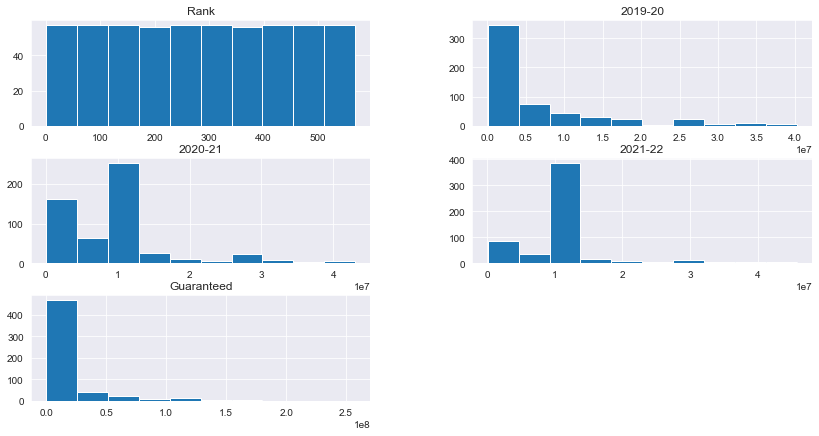

In [23]:
# plot histogram of numerical data
nba_df.hist(figsize=(14,7));

#### Relationship between the Rank of the Player and the Salary of the Player

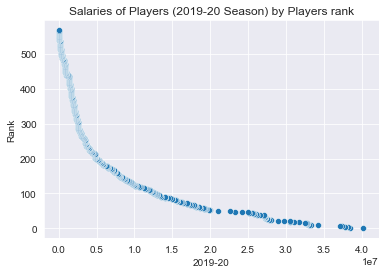

In [57]:
sb.scatterplot(y='Rank', x='2019-20', data=nba_df)
plt.title('Salaries of Players (2019-20 Season) by Players rank');

* From the plot above, it can be deduced that the salaries of players have a negative correlation with the rank of the player.
* A player ranked as 1 has the highest salary while least ranked players have lower salaries. 

In [25]:
# check the skewness of the variables
nba_df.skew().sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp/ipykernel_2924/2031356526.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nba_df.skew().sort_values(ascending=False)


Guaranteed   3.32
2021-22      2.19
2020-21      1.93
2019-20      1.87
Rank         0.00
dtype: float64

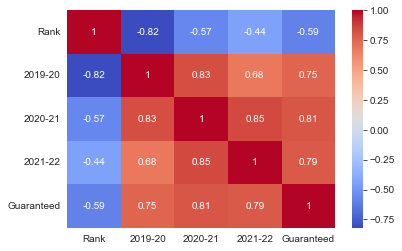

In [26]:
# show the correlation between the variables
sb.heatmap(nba_df.corr(), cmap='coolwarm',annot=True);

In [27]:
# check for outliers in columns

def outliers_check():
    col_store=[]
    
    for col in nba_df.select_dtypes('number'):
        q1=nba_df[col].quantile(.25)
        q3=nba_df[col].quantile(.75)
        
        iqr=q3-q1
        lower_out=(nba_df[col] < (q1-(1.5*iqr))).sum()
        upper_out=(nba_df[col] > (q3 + (1.5 *iqr))).sum()
        
        if lower_out > 0 or upper_out >0:
            col_store.append(col)
    return col_store

In [28]:
outlier_col=outliers_check()
outlier_col

['2019-20', '2020-21', '2021-22', 'Guaranteed']

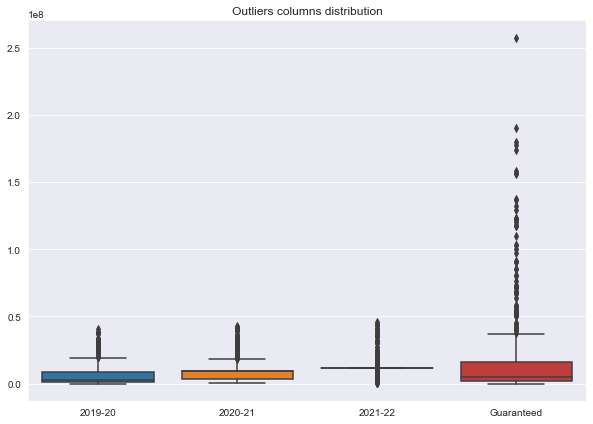

In [29]:
plt.figure(figsize=(10,7))
sb.boxplot(data=nba_df[outlier_col])
plt.title('Outliers columns distribution');

#### Average salary paid to the player by Signed using in the year 2019-2020

In [30]:
average_salary_2020=nba_df.groupby('Signed Using', as_index=False).mean()
average_salary_2020.sort_values(by='2019-20',ascending=False)

,Signed Using,Rank,2019-20,2020-21,2021-22,Guaranteed
6,maximum salary,10.00,"33,005,556.00","35,450,412.00","37,895,268.00","68,455,968.00"
11,sign and trade,71.10,"21,553,396.60","20,821,232.04","21,657,126.82","66,837,576.40"
2,bird rights,72.23,"20,528,337.61","20,154,661.31","20,478,783.89","60,265,020.95"
3,cap space,170.50,"12,016,712.74","11,608,434.99","12,108,163.83","22,356,945.61"
5,early bird rights,180.67,"6,970,167.56","8,193,093.24","10,913,677.28","12,643,888.89"
0,1st round pick,310.58,"4,681,595.52","8,683,456.65","10,431,902.79","15,164,076.85"
10,room exception,225.13,"4,311,837.40","5,144,683.99","11,534,705.22","6,657,116.67"
9,non-bird exception,284.50,"3,566,067.00","5,584,196.20","11,534,705.22","3,566,067.00"
1,bi-annual exception,257.00,"3,249,333.33","3,350,333.33","11,534,705.22","5,332,666.67"
8,mle,363.41,"2,660,790.63","4,537,110.11","7,723,901.04","6,262,407.33"


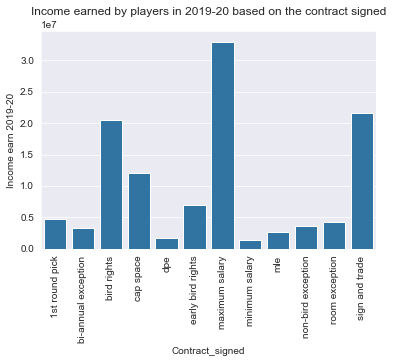

In [31]:
color=sb.color_palette()[0]
sb.barplot(data=average_salary_2020, x='Signed Using', y='2019-20',color=color);
plt.xlabel('Contract_signed')
plt.ylabel('Income earn 2019-20')
plt.title('Income earned by players in 2019-20 based on the contract signed')
plt.xticks(rotation=90);

#### Observation
From the chat above signed using with value Maximum_salary has highest average income in year 2019-20

In [32]:
#Team salary by Guaraneed
salary_team=nba_df.groupby('Team',as_index=False).mean()
salary_team.sort_values(by='Guaranteed', ascending=False)

,Team,Rank,2019-20,2020-21,2021-22,Guaranteed
22,phi,264.71,"7,663,126.29","11,963,285.90","14,775,558.29","37,523,317.35"
24,por,276.11,"7,312,067.89","9,244,857.36","12,929,729.10","28,443,006.26"
7,den,259.50,"8,184,138.00","10,855,597.24","13,740,685.89","28,133,715.25"
9,gsw,386.65,"6,576,396.50","10,259,689.02","11,947,068.38","28,092,493.10"
11,ind,226.00,"7,169,282.88","9,510,045.26","10,864,986.72","25,110,165.25"
17,min,253.50,"8,282,040.31","8,348,303.72","10,474,064.66","23,270,042.12"
1,bos,284.00,"6,734,755.94","9,373,417.57","11,249,583.79","19,264,158.72"
16,mil,264.48,"6,429,805.95","9,426,867.04","11,817,677.10","19,170,995.52"
10,hou,337.71,"6,217,377.90","10,691,818.14","13,627,405.91","18,888,113.95"
6,dal,249.67,"6,783,170.89","9,140,565.47","11,079,803.51","18,632,011.28"


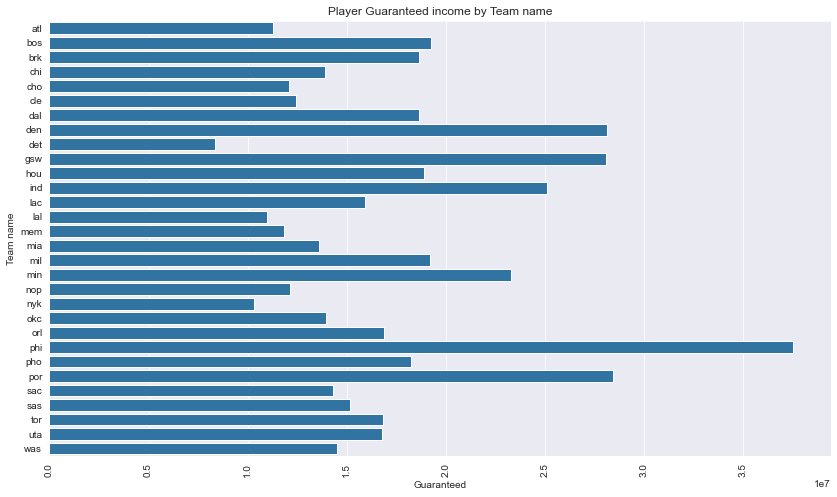

In [33]:
plt.figure(figsize=(14,8))
color=sb.color_palette()[0]
sb.barplot(data=salary_team, y='Team', x='Guaranteed',color=color);
plt.xlabel('Guaranteed')
plt.ylabel('Team name')
plt.title('Player Guaranteed income by Team name')
plt.xticks(rotation=90);

In [34]:
#Team salary by Guaraneed
salary_team=nba_df.groupby('Team',as_index=False).mean()
salary_team.sort_values(by='Guaranteed', ascending=False)

,Team,Rank,2019-20,2020-21,2021-22,Guaranteed
22,phi,264.71,"7,663,126.29","11,963,285.90","14,775,558.29","37,523,317.35"
24,por,276.11,"7,312,067.89","9,244,857.36","12,929,729.10","28,443,006.26"
7,den,259.50,"8,184,138.00","10,855,597.24","13,740,685.89","28,133,715.25"
9,gsw,386.65,"6,576,396.50","10,259,689.02","11,947,068.38","28,092,493.10"
11,ind,226.00,"7,169,282.88","9,510,045.26","10,864,986.72","25,110,165.25"
17,min,253.50,"8,282,040.31","8,348,303.72","10,474,064.66","23,270,042.12"
1,bos,284.00,"6,734,755.94","9,373,417.57","11,249,583.79","19,264,158.72"
16,mil,264.48,"6,429,805.95","9,426,867.04","11,817,677.10","19,170,995.52"
10,hou,337.71,"6,217,377.90","10,691,818.14","13,627,405.91","18,888,113.95"
6,dal,249.67,"6,783,170.89","9,140,565.47","11,079,803.51","18,632,011.28"


In [35]:
# let check the first ten players with high salary
player_salary=nba_df.groupby('Player', as_index=False).mean()
player_salary.sort_values(by='2019-20', ascending=False)[:10]

,Player,Rank,2019-20,2020-21,2021-22,Guaranteed
455,stephen curry\curryst01,1.00,"40,231,758.00","43,006,362.00","45,780,966.00","129,019,086.00"
69,chris paul\paulch01,2.00,"38,506,482.00","41,358,814.00","44,211,146.00","79,865,296.00"
433,russell westbrook\westbru01,3.00,"38,178,000.00","41,006,000.00","43,848,000.00","123,032,000.00"
218,james harden\hardeja01,5.00,"37,800,000.00","40,824,000.00","43,848,000.00","122,472,000.00"
252,john wall\walljo01,4.00,"37,800,000.00","40,824,000.00","43,848,000.00","122,472,000.00"
323,lebron james\jamesle01,6.00,"37,436,858.00","39,219,565.00","41,002,273.00","76,656,423.00"
295,kevin durant\duranke01,7.00,"37,199,000.00","39,058,950.00","40,918,900.00","117,176,850.00"
34,blake griffin\griffbl01,8.00,"34,234,964.00","36,595,996.00","38,957,028.00","70,830,960.00"
311,kyle lowry\lowryky01,9.00,"33,296,296.00","30,000,000.00","11,534,705.22","63,296,296.00"
408,paul george\georgpa01,10.00,"33,005,556.00","35,450,412.00","37,895,268.00","68,455,968.00"


#### Observation:
From the table above stephen curry is the player with highest Average salary of 40,231,758.00 in year 2019-20

In [36]:
#least Ten player with lower average income 2019-20
player_salary.sort_values(by='2019-20', ascending=False)[-10:]

,Player,Rank,2019-20,2020-21,2021-22,Guaranteed
156,eric mika\mikaer01,557.00,"50,752.00","9,384,835.40","11,534,705.22","50,752.00"
347,marques bolden\boldema01,560.00,"50,752.00","9,384,835.40","11,534,705.22","50,752.00"
522,zach norvell\norveza01,558.00,"50,752.00","9,384,835.40","11,534,705.22","50,752.00"
448,sir'dominic pointer\pointsi01,561.00,"50,752.00","9,384,835.40","11,534,705.22","50,752.00"
338,malik newman\newmama01,559.00,"50,752.00","9,384,835.40","11,534,705.22","50,752.00"
514,william howard\howarwi01,564.00,"50,000.00","9,384,835.40","11,534,705.22","50,000.00"
188,hollis thompson\thompho01,567.00,"50,000.00","9,384,835.40","11,534,705.22","50,000.00"
499,tyler ulis\ulisty01,568.00,"50,000.00","9,384,835.40","11,534,705.22","50,000.00"
498,tyler lydon\lydonty01,566.00,"50,000.00","9,384,835.40","11,534,705.22","50,000.00"
195,isaiah taylor\taylois01,565.00,"50,000.00","9,384,835.40","11,534,705.22","50,000.00"


#### Observation:
From the table above William Howard, Hollis thompson,Tyler Ulis, Tyler Lydon and Isaiah Taylor are players with least average salaries in 2019-20.

### Summary of EDA
* From the exploratory data analysis above, it is discovered that majorly all numerical columns contains significant numbers except player and rank column which is normally distributed. The 2021-22 salary column which happens to have the highest number of outliers might be as result of missing values which was replaced with the mean of the columns. 

* The Guaranteed and 2021-22 columns are mostly skewed. At the end of the analysis, it can be seen from the scatterplot that the player ranked as 1 is the highest paid player which also falls as one of the mostly paid player known as Stephen Curry. 

* It is also observed that the maximum salary contract has least amount of players signed to it, this may be as a result of the team capabilty to maintain the high price.

#### Saving the cleaned dataset

In [37]:
cleaned_data = nba_df.to_csv('cleaned_data.csv', index=False)
cleaned_data

### Machine Learning Model

In [38]:
# making a copy of the cleaned data to work with
nba = nba_df.copy()

In [42]:
# converting categorical columns to numerical variables for training

cat_cols = ['Signed Using', 'Player', 'Team']

#load the LabelEncoder
labelencoder = LabelEncoder()
nba_df[cat_cols] = nba_df[cat_cols].apply(lambda col: labelencoder.fit_transform(col))

#Load OneHotEncoder
onehotencoder = OneHotEncoder()
array_hot_encoded = onehotencoder.fit_transform(nba_df[cat_cols])
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=nba_df.index)

data_other_cols = nba_df.drop(columns = cat_cols)
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

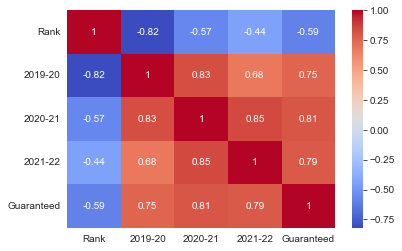

In [43]:
# display correlation between variables
sb.heatmap(nba.corr(), cmap='coolwarm', annot=True);

In [44]:
# normalize the dataset using min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(nba_df), columns=nba_df.columns)

x = normalized_df[['Rank', 'Signed Using', 'Team']]
y = normalized_df['2019-20']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split the normalized data into test and train set
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state=42)

In [46]:
#Define our model
reg_model = LinearRegression()

# fit the model
reg_model.fit(x_train, y_train)

# predict on test set
predicted_value = reg_model.predict(x_test)

In [47]:
# find r2 score

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 2)

0.66

In [48]:
# evaluating the model based on mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_value)
round(mae, 2)

0.1

### Predicting the 2020 salaries based on previous salary 2019 and rank of the player

#### Using Linear Regression Model

In [49]:
# predicting the 2020 salaries based on previous salary 2019 and rank of the player

x1 = normalized_df[['Rank','2019-20']]
y1 = normalized_df['2020-21']

# split the normalized data into test and train set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.7, test_size = 0.3, random_state=42)

In [50]:
#Define our model
linear_model = LinearRegression()

# fit the model
linear_model.fit(x1_train, y1_train)

# predict on test set
pred_value = linear_model.predict(x1_test)

# evaluating the model based on mean absolute error
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y1_test, pred_value)
print("The mean absolute error is", round(mae1, 2))

# find r2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, pred_value)
print('The r-squared error is', round(r2_score, 2))

The mean absolute error is 0.07
The r-squared error is 0.84


#### Using Decision Tree Algorithm

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Fit decision tree model
model = DecisionTreeRegressor()
model.fit(x1_train, y1_train)

# evaluating the model based on mean absolute error
from sklearn.metrics import mean_absolute_error
mae1 = mean_absolute_error(y1_test, pred_value)
print("The mean absolute error is", round(mae1, 2))

The mean absolute error is 0.07


In [52]:
# evaluate the model based on R2 score
from sklearn.metrics import r2_score
r2_score = r2_score(y1_test, pred_value)
print('The R-squared error', round(r2_score, 2))

The R-squared error 0.75


### Conclusion

* Two machine learning linear algorithms are used to carry our prediction, the linear regression and the decision tree algorithm. The first model developed is used to predict the 2019-20 salaries of the players. A mean absolute error of 0.1 and R-squared error of 0.65 is obtained

* The second and third model developed is to predict the salries of the 2020-21 season. The rank and the previous season salary is used. The model developed with the linear regression algorithm had a higher coefficient of determination (R2) of 0.84 and and a mean absolute error of 0.07. The linear regression performed better than the decision tree algorithm in terms of R2 error.

* In conclusion, from the predictions made above it can be further deduced that a players salary will increase as the season increases especially for top players. Due to the limitation of insufficient independent variables and presence of missing data, predictions made are based on salaries of previous year and the rank of the player. 